<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_10_Recommendation_BookDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement.

##### Build a recommender system by using cosine simillarties score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a class="anchor" id="1"></a>
### A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications. (source - Wikipedia)

## Mainly three types of recommendation systems in machine learning based on filtering are used to suggest product and services to the consumers.

1. Content Filtering

2. Collaborative Filtering

3. Hybrid Filtering

### 1. Content Filtering:

In this algorithm, we try finding items look alike. Once we have item look like matrix,we can easily recommend alike items to a customer, who has purchased any item from the store.

### 2. Collaborative Filtering:

Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.This algorithm is very effective but takes a lot of time and resources.

### 3. Hybrid Filtering (Content Filtering + Collaborative Filtering):

Both Content Filtering & Collaborative Filtering is used for the purpose. you-tube uses this algorithm for their strong recommendation system.


In [ ]:
books = pd.read_csv('/content/book (1).csv', encoding = 'Latin1')
books

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


### About Dataset<a class="anchor" id="1.1"></a>
Contains 2182 users providing ratings from 0 as minimum and 10 as maximum about 9659 books.

## Data Exploration

In [ ]:
# Renaming column names
books = books.rename({'User.ID':'User_id', 'Book.Title':'title', 'Book.Rating':'rating'}, axis=1)
books

,Unnamed: 0,User_id,title,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [ ]:
# Deleting unnecessary columns
del books['Unnamed: 0']

In [ ]:
print('Number of unique users are {}'.format(len(books['User_id'].unique())))

Number of unique users are 2182


In [ ]:
print('Number of unique users are {}'.format(len(books['title'].unique())))

Number of unique users are 9659


In [ ]:
books.rating.value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: rating, dtype: int64

In [ ]:
books.User_id.unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129])

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User_id  10000 non-null  int64 
 1   title    10000 non-null  object
 2   rating   10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
books.rating.describe()

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: rating, dtype: float64

In [ ]:
# Checking null values
books.isnull().sum()

User_id    0
title      0
rating     0
dtype: int64

In [ ]:
books.shape

(10000, 3)

In [ ]:
# Checking duplicated values
books[books.duplicated()]

,User_id,title,rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [ ]:
books.drop(books.index[[5051, 7439]], inplace=True, axis = 0)

In [ ]:
books.shape

(9998, 3)

Let's create a ratings dataframe with average rating and number of ratings:

In [ ]:
books.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: rating, dtype: float64

As we do not know the number of times the above 10 Rated books are rated we cannot take these ratings into consideration until a number of Users have rated the same books a considerate times

In [ ]:
books.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Fahrenheit 451                                     5
Vanished                                           4
Stardust                                           4
Ender's Game (Ender Wiggins Saga (Paperback))      4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
Charlie and the Chocolate Factory                  4
The Hitchhiker's Guide to the Galaxy               3
The Golden Compass (His Dark Materials, Book 1)    3
My Side of the Mountain                            3
Name: rating, dtype: int64

In [ ]:
ratings = pd.DataFrame(books.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [ ]:
ratings['num of ratings'] = pd.DataFrame(books.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


### Data Visualization<a class="anchor" id="3"></a>

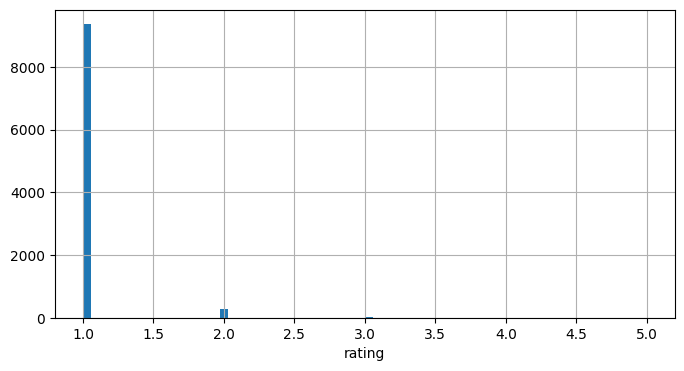

In [ ]:
plt.figure(figsize=(8,4))
ratings['num of ratings'].hist(bins=70)
plt.xlabel('rating')
plt.show()

##### Observation: Maximum Number of Books are Rated only Once

Text(0.5, 0, 'ratings')

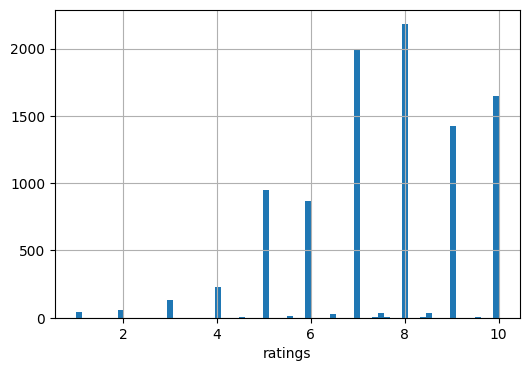

In [ ]:
plt.figure(figsize=(6,4))
ratings['rating'].hist(bins=70)
plt.xlabel('ratings')

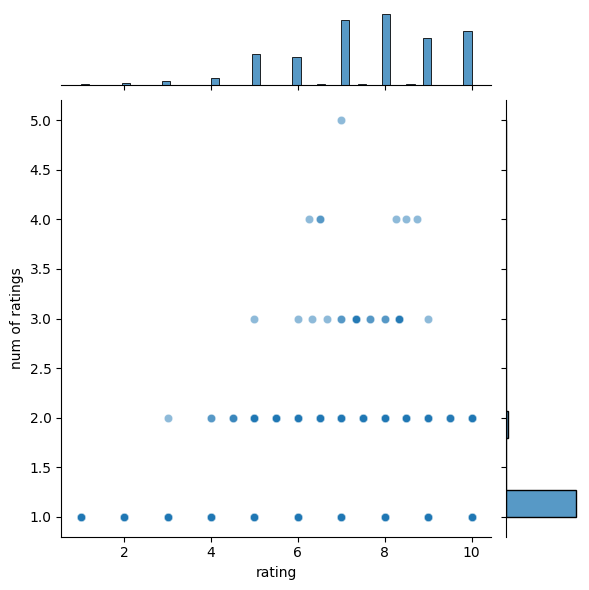

In [ ]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

Text(0.5, 0, 'rating')

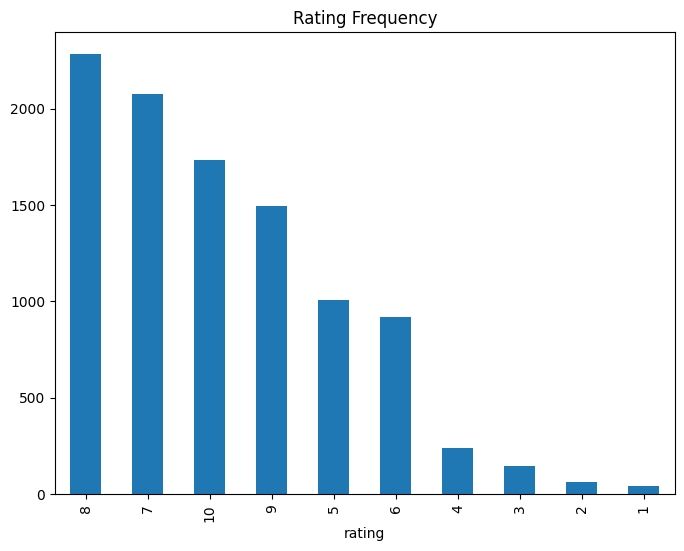

In [ ]:
plt.figure(figsize=(8,6))
books['rating'].value_counts().plot(kind='bar')
plt.title('Rating Frequency')
plt.xlabel('rating')

### Observations:
+ #### Most Frequent Ratings by Users are: 8,7 and 10

In [ ]:
top_books = books['title'].value_counts().head(10)
top_books.index

Index(['Fahrenheit 451', 'Stardust',
       'The Amber Spyglass (His Dark Materials, Book 3)',
       'Ender's Game (Ender Wiggins Saga (Paperback))',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Charlie and the Chocolate Factory', 'My Side of the Mountain', 'It',
       'Wuthering Heights'],
      dtype='object')

In [ ]:
top_books.shape

(10,)

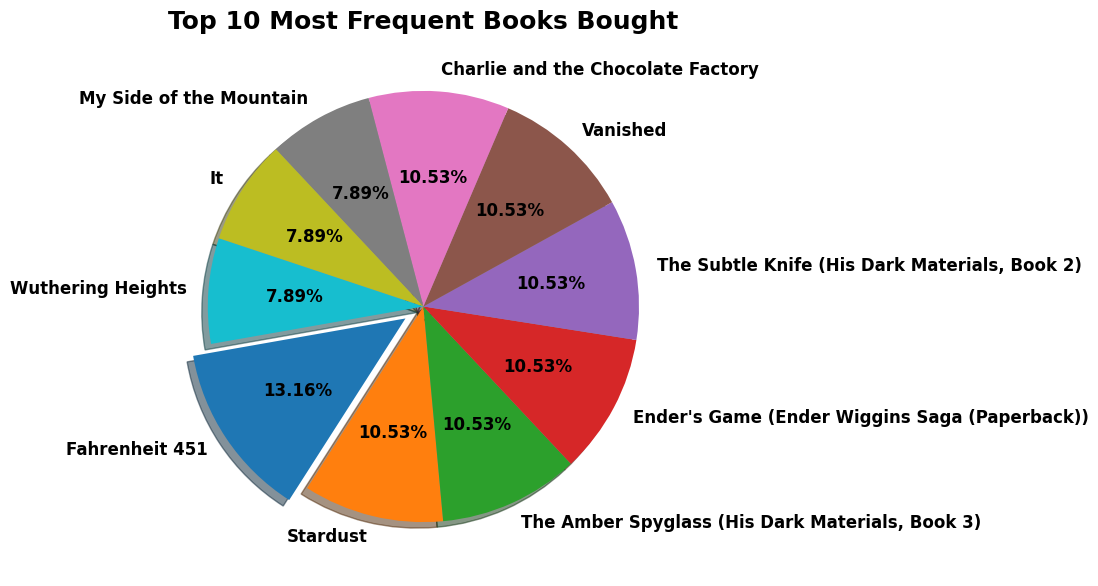

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(top_books,
        labels = top_books.index,
        explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct = '%.2f%%',
        shadow=True,
        startangle=190,
         textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})

plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold')
plt.show()


# Collaborative Recommender System Using Cosine Similarity<a class="anchor" id="5.3"></a>

In [ ]:
user_book_df = books.pivot_table(index='User_id', columns='title',values='rating').fillna(0)
user_book_df

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [ ]:
# Calculating Cosine based similarity between users
from sklearn.metrics import pairwise_distances

In [ ]:
user_sim = 1 - pairwise_distances(user_book_df.values, metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Store the results in Dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [ ]:
np.fill_diagonal(user_sim,0)
user_sim_df.iloc[0:5,0:5]

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Set the index and column name to user ID's
user_sim_df.index = list(user_sim_df.index)
user_sim_df.columns = list(user_sim_df.index)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_id_eight = user_sim_df.sort_values([9], ascending=False).head(100)
user_id_eight[9]

0       0.0
1457    0.0
1451    0.0
1452    0.0
1453    0.0
       ... 
1371    0.0
1370    0.0
1369    0.0
1368    0.0
1367    0.0
Name: 9, Length: 100, dtype: float64

In [ ]:
books[(books['User_id']==8) | (books['User_id']== 14)]

,User_id,title,rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7
2409,14,COPS,5
2410,14,A Cold Heart: An Alex Delaware Novel,5
2411,14,Dead Sleep,6


In [ ]:
# Most similar users
user_sim_df.idxmax(axis=1)

0          0
1          0
2          0
3          0
4          0
        ... 
2177       0
2178       0
2179    1999
2180       0
2181       0
Length: 2182, dtype: int64

### Recommnedation Based on Cosine Similarity<a class="anchor" id="5.4"></a>

In [ ]:
def give_reco(customer_id):
  tem = list(user_sim_df.sort_values([customer_id], ascending=False).head(100).index)
  movie_list = []
  for i in tem:
    movie_list = movie_list+list(books[books['User_id']==i]['title'])
  return set(movie_list)-set(books[books['User_id']==customer_id]['title'])

In [ ]:
give_reco(11)

{'A Kiss on the Nose Turns Anger Aside',
 'A Wizard of Earthsea (Earthsea Trilogy, Book 1)',
 'American Greats',
 'Animal Liberation',
 'Bad Medicine',
 'Bag of Bones',
 'Barrier Island',
 'Call Each River Jordan',
 "Chicken Soup for the Writer's Soul : Stories to Open the Heart and Rekindle the Spirit of Writers (Chicken Soup for the Soul)",
 'City of Djinns: A Year in Delhi',
 'Claudia and the Phantom Phone Calls (Baby-Sitters Club, 2)',
 'Come Love a Stranger',
 'DAWNFIRE',
 "Daughter of Camelot (Merlin's Legacy, No 6)",
 'Deep South',
 'Dreamcatcher',
 'Dreaming in Cuban',
 'El Codigo Da Vinci / The Da Vinci Code',
 'Ella Enchanted (Trophy Newbery)',
 'Faded Coat of Blue',
 'Feast of All Saints',
 'Fifth business',
 'Flow: The Psychology of Optimal Experience',
 "Fodor's 97 Walt Disney World, Universal Studios and Orlando (Fodor's)",
 'Forever in Your Embrace',
 'Great Book Of Whodunit Puzzles: Mini-Mysteries For You To Solve',
 'Greenwitch',
 'Group: Six People in Search of a Life

In [ ]:
give_reco(114)

{'A Kiss on the Nose Turns Anger Aside',
 'A Wizard of Earthsea (Earthsea Trilogy, Book 1)',
 'American Greats',
 'Animal Liberation',
 'Bad Medicine',
 'Bag of Bones',
 'Barrier Island',
 'Call Each River Jordan',
 "Chicken Soup for the Writer's Soul : Stories to Open the Heart and Rekindle the Spirit of Writers (Chicken Soup for the Soul)",
 'City of Djinns: A Year in Delhi',
 'Claudia and the Phantom Phone Calls (Baby-Sitters Club, 2)',
 'Come Love a Stranger',
 'DAWNFIRE',
 "Daughter of Camelot (Merlin's Legacy, No 6)",
 'Deep South',
 'Dreamcatcher',
 'Dreaming in Cuban',
 'El Codigo Da Vinci / The Da Vinci Code',
 'Ella Enchanted (Trophy Newbery)',
 'Faded Coat of Blue',
 'Feast of All Saints',
 'Fifth business',
 'Flow: The Psychology of Optimal Experience',
 "Fodor's 97 Walt Disney World, Universal Studios and Orlando (Fodor's)",
 'Forever in Your Embrace',
 'Great Book Of Whodunit Puzzles: Mini-Mysteries For You To Solve',
 'Greenwitch',
 'Group: Six People in Search of a Life